In [10]:
import sys

from evoman.environment import Environment
from demo_controller import player_controller

# imports other libs
import numpy as np
import os

from optimization_dummy import run as run_dummy

results = {1: {}, 2: {}, 3: {}}

gens = 10

for enemy in [1, 2, 3]:
    means = np.zeros(10)
    bests = np.zeros(10)
    stds = np.zeros(10)
    
    for i in range(10):
        run_results = run_dummy(enemy)
        means += run_results['mean']
        bests += run_results['best']
        stds += run_results['std']
        #results[enemy].append(run_results)

    means /= 10
    bests /= 10
    stds /= 10

    results[enemy]['mean'] = means
    results[enemy]['best'] = bests
    results[enemy]['std'] = stds


MESSAGE: Pygame initialized for simulation.

########## Simulation state - INI ###########

# solutions # : EMPTY 

# sensors # : 20

 ------  parameters ------  

# contact hurt (training agent) # : player

multiple mode: no

enemies list: 1

current enemy: 1

player mode: ai

enemy mode: static

level: 2

clock precision: low

inputs coded: no

random initialization: no

expiration time: 3000

speed: fastest

load player: yes

load enemy: yes

sound: off

overture time: 100

logs: on

save logs: yes

########## Simulation state - END ###########

 GENERATION 0 39.013548 -4.185587 7.336357
Gen 1 - Best: 39.17991706964764 - Mean: -2.421243986381852
Gen 2 - Best: 39.17991706964764 - Mean: -1.1483478757176295
Gen 3 - Best: 48.013547994715566 - Mean: -0.5149624419896678
Gen 4 - Best: 48.013547994715566 - Mean: 0.7546332484872644
Gen 5 - Best: 48.013547994715566 - Mean: 1.0469051128100408
Gen 6 - Best: 48.013547994715566 - Mean: 1.410788570426299
Gen 7 - Best: 48.013547994715566 - Mean: 2

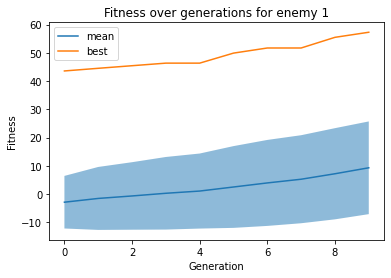

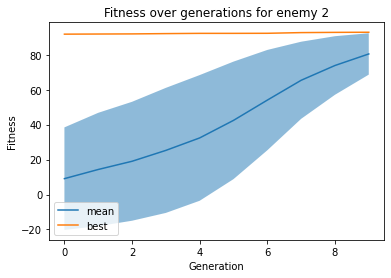

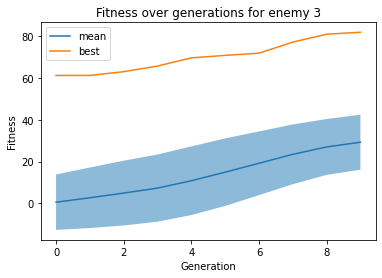

In [12]:
# plot means and best fitness
import matplotlib.pyplot as plt

for i in [1,2,3]:
    plt.figure()
    plt.plot(results[i]['mean'], label='mean')
    plt.plot(results[i]['best'], label='best')
    plt.fill_between(range(gens), results[i]['mean']-results[i]['std'], results[i]['mean']+results[i]['std'], alpha=0.5)
    plt.legend()
    # add title: fitness over generations for enemy 2
    plt.title('Fitness over generations for enemy ' + str(i))
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
